In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pandas as pd
import sklearn

In [ ]:
upd = files.upload()
smt_df = pd.read_csv(io.BytesIO(upd['Smartphone_PRED_GIRISH_s1.csv']))

Saving Smartphone_PRED_GIRISH_s1.csv to Smartphone_PRED_GIRISH_s1.csv


In [ ]:
smt_df.head(10)

,BATTERY,RAM,PPI,INT.MEM,EXT.MEM,F.CAM,R.CAM,DISP,PRICE
0,2200,1,294,8,32,5,8,12.70,4800
1,3000,2,197,16,256,5,8,13.84,5000
2,2000,1,215,8,32,5,8,12.70,4700
3,2000,2,294,16,32,2,8,12.90,5100
4,3000,1,311,16,512,5,8,13.46,5600
5,3100,2,196,16,256,5,5,12.80,5200
6,4100,1,294,8,128,5,8,12.70,7000
7,3000,2,282,16,128,8,13,13.21,7100
8,2900,3,282,32,128,16,13,14.48,7300
9,6000,4,294,64,1000,8,57,16.55,9000


In [ ]:
smt_df.columns

Index(['BATTERY', 'RAM', 'PPI', 'INT.MEM', 'EXT.MEM', 'F.CAM', 'R.CAM', 'DISP',
       'PRICE'],
      dtype='object')

In [ ]:
smt_df.corr()

,BATTERY,RAM,PPI,INT.MEM,EXT.MEM,F.CAM,R.CAM,DISP,PRICE
BATTERY,1.000000,0.456919,0.354915,0.274180,0.396550,0.357543,0.558666,0.739466,0.316202
RAM,0.456919,1.000000,0.617047,0.717316,0.276987,0.460144,0.725915,0.714483,0.795699
PPI,0.354915,0.617047,1.000000,0.493377,0.185312,0.375180,0.624677,0.588821,0.609666
INT.MEM,0.274180,0.717316,0.493377,1.000000,0.252086,0.268565,0.413840,0.491585,0.755450
EXT.MEM,0.396550,0.276987,0.185312,0.252086,1.000000,0.390918,0.288589,0.434249,0.483840
F.CAM,0.357543,0.460144,0.375180,0.268565,0.390918,1.000000,0.517738,0.454763,0.413525
R.CAM,0.558666,0.725915,0.624677,0.413840,0.288589,0.517738,1.000000,0.650463,0.589386
DISP,0.739466,0.714483,0.588821,0.491585,0.434249,0.454763,0.650463,1.000000,0.654842
PRICE,0.316202,0.795699,0.609666,0.755450,0.483840,0.413525,0.589386,0.654842,1.000000


In [ ]:
plt.style.use('ggplot')

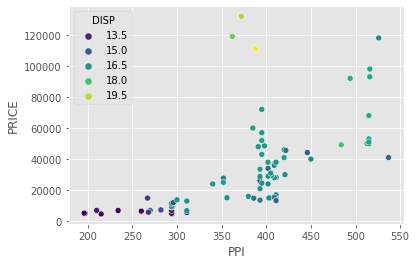

In [ ]:
sns.scatterplot(data=smt_df , x= 'PPI' ,y='PRICE' , hue = 'DISP' , palette='viridis')

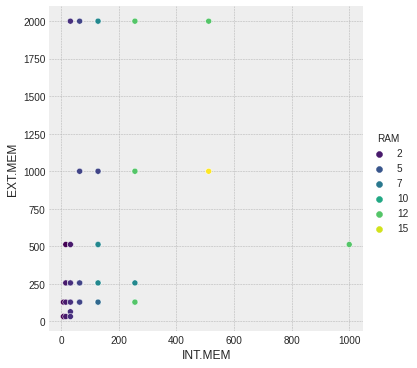

In [ ]:
plt.style.use('seaborn-pastel')
sns.relplot(data = smt_df , x= 'INT.MEM' ,y='EXT.MEM' , hue = 'RAM' , palette='viridis')

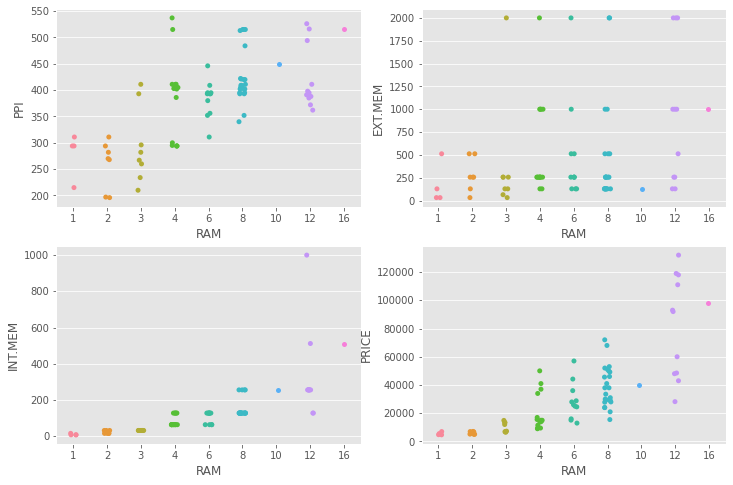

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.stripplot(x = 'RAM', y = 'PPI', data = smt_df, jitter = True)
plt.subplot(2,2,2)
sns.stripplot(x = 'RAM', y = 'EXT.MEM', data = smt_df, jitter = True)
plt.subplot(2,2,3)
sns.stripplot(x = 'RAM', y = 'INT.MEM', data = smt_df, jitter = True)
plt.subplot(2,2,4)
sns.stripplot(x = 'RAM', y = 'PRICE', data = smt_df, jitter = True)

In [ ]:
X = smt_df[['BATTERY', 'RAM', 'PPI', 'INT.MEM', 'EXT.MEM', 'F.CAM', 'R.CAM', 'DISP']]
Y = smt_df['PRICE']

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.32 , random_state = 20)

In [ ]:
from sklearn.linear_model import LinearRegression
smt_lr = LinearRegression()
smt_lr.fit(X_train,Y_train)
print(smt_lr.intercept_)

-79576.54943758374


In [ ]:
X_train.columns

Index(['BATTERY', 'RAM', 'PPI', 'INT.MEM', 'EXT.MEM', 'F.CAM', 'R.CAM',
       'DISP'],
      dtype='object')

In [ ]:
smt_lr.coef_

array([  -9.03602637, 2799.05795414,   35.11112666,   72.92332838,
         10.72986101, -135.14507503,   20.2314417 , 6633.18850537])

In [ ]:
cd = pd.DataFrame(smt_lr.coef_ ,X_train.columns , columns = ['coef'])
cd

,coef
BATTERY,-9.036026
RAM,2799.057954
PPI,35.111127
INT.MEM,72.923328
EXT.MEM,10.729861
F.CAM,-135.145075
R.CAM,20.231442
DISP,6633.188505


In [ ]:
pred = smt_lr.predict(X_test)

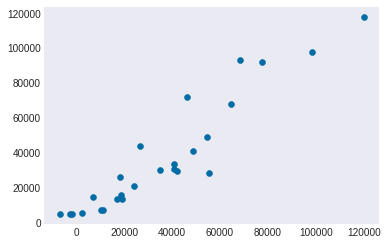

In [ ]:
plt.style.use('tableau-colorblind10')
plt.scatter(pred,Y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


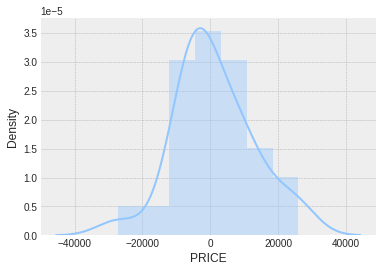

In [ ]:
plt.style.use('seaborn-pastel')
sns.distplot(Y_test-pred)

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(Y_test,pred)

8841.160025799834

In [ ]:
np.sqrt(metrics.mean_squared_error(Y_test,pred))

11480.0789126426

In [ ]:
test_vl = [4500,12,396,64,2000,32,64,17.21] # Some random specification
ar = np.array(test_vl).reshape(-1,8)

In [ ]:
price = smt_lr.predict(ar)
print("Estimated Price for given Specs : Rs." , int(price))

Estimated Price for given Specs : Rs. 64508
